# The USD / EUR exchange rate



In [42]:
# import relevant packages
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Download historical exchange rate data for the DKK/USD currency pair using Yahoo Finance. Use '2006-01-01' as start date. 

### Solution

In [50]:
fx_data = yf.download('DKKUSD=X', start='2006-01-01')

[*********************100%%**********************]  1 of 1 completed


In [51]:
fx_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02,0.158607,0.158897,0.158479,0.158336,0.158336,0
2006-01-03,0.159284,0.159360,0.159109,0.161267,0.161267,0
2006-01-04,0.161715,0.162425,0.161645,0.162356,0.162356,0
2006-01-05,0.162198,0.162198,0.161993,0.162290,0.162290,0
2006-01-06,0.162077,0.163100,0.162030,0.162798,0.162798,0


## Problem 2

Define two `pd.Series` with the DKK / USD and USD / DKK exchange rate using the closing price. 

### Solution

In [52]:
# define two pandas series with the FX cross
dkkusd = fx_data['Close']
usddkk = 1.0 / dkkusd

# define the inverse cross
log_dkkusd = np.log(dkkusd)
log_usddkk = np.log(usddkk)

## Problem 3

Plot the time series of the exchanges rates and the natural logarithm of the exhanges rates in two seperate figures. 

### Solution


Text(0, 0.5, 'USDDKK')

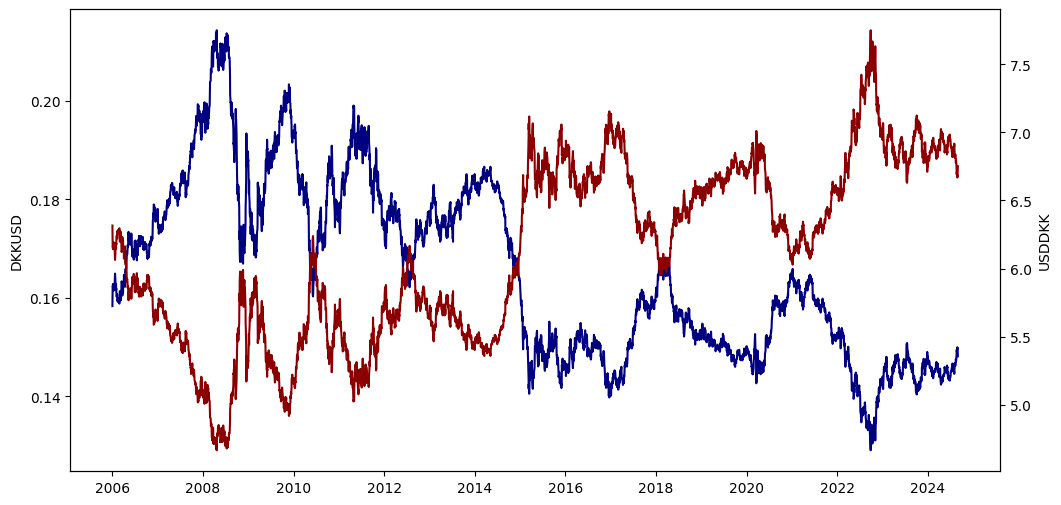

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dkkusd.index, dkkusd, label="", color="navy")
ax.set_ylabel('DKKUSD')

ax = ax.twinx()

ax.plot(usddkk.index, usddkk, label="", color="darkred")
ax.set_ylabel('USDDKK')

Text(0, 0.5, 'log USDDKK')

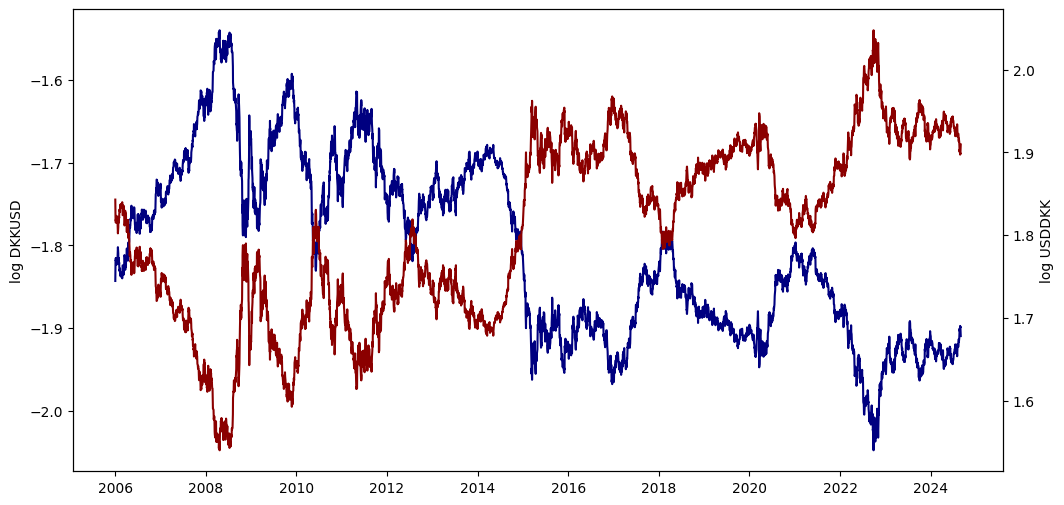

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dkkusd.index, log_dkkusd, label="", color="navy")
ax.set_ylabel('log DKKUSD')

ax = ax.twinx()

ax.plot(usddkk.index, log_usddkk, label="", color="darkred")
ax.set_ylabel('log USDDKK')

## Problem 4

Plot the density of the weekly changes in DKK / USD (pct. change) and the natural logarithm of DKK / USD. Use either a histogram from the `matplotlib` package or `seaborn.kdeplot`. 

### Solution

In [65]:
dkkusd.resample('W').last().diff().dropna()

Date
2006-01-15   -0.000021
2006-01-22   -0.000114
2006-01-29   -0.000562
2006-02-05   -0.001070
2006-02-12   -0.001594
                ...   
2024-08-04   -0.000826
2024-08-11    0.001710
2024-08-18    0.000793
2024-08-25    0.001926
2024-09-01   -0.000862
Freq: W-SUN, Name: Close, Length: 973, dtype: float64

In [66]:
weekly_chg_dkkusd = dkkusd.resample('W').last().pct_change().dropna()
weekly_chg_log_dkkusd = log_dkkusd.resample('W').last().diff().dropna()

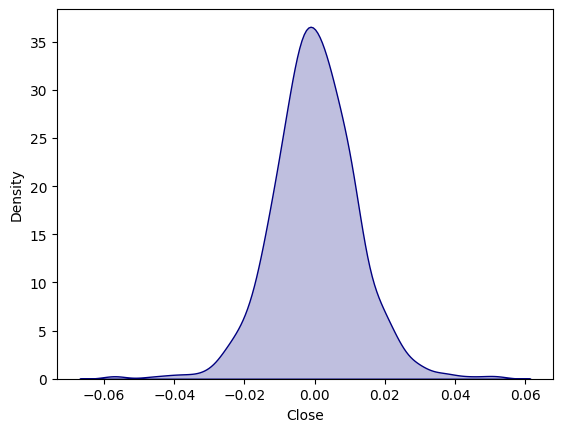

In [68]:
import seaborn as sns

sns.kdeplot(weekly_chg_dkkusd, fill=True, color="navy"); 

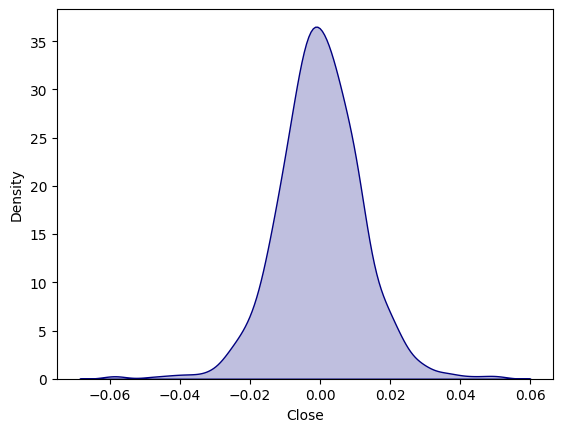

In [69]:
sns.kdeplot(weekly_chg_log_dkkusd, fill=True, color="navy");